<H2> Using FMP data to chart bollinger bands </H2>

In [1]:
import os
from dotenv  import find_dotenv, load_dotenv
load_dotenv(find_dotenv())

True

In [2]:
import requests as r
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
FMP_API_KEY = os.getenv("FMP_API_KEY")

In [4]:
def get_ticker(stock):
    stockprices = r.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/{stock}?serietype=line&apikey={FMP_API_KEY}')
    stockprices = stockprices.json()
    return stockprices

In [5]:
def plot_charts(stockprices):
    stockprices[['close','MA20','Upper','Lower']].plot(figsize=(10,4))
    # plt.plot(stockprices150['close'], label='Closing Price', color='blue')
    plt.grid(True)
    plt.title('Meta' + ' Bollinger Bands')
    plt.axis('tight')
    plt.ylabel('Price')

In [10]:
def chart_bollinger_bands(stockprices):
    stockprices150 = stockprices['historical'][:150]
    stockprices150 = pd.DataFrame.from_dict(stockprices150)
    stockprices150 = stockprices150.set_index('date')
    stockprices150 = stockprices150.sort_index()
    stockprices150['MA20'] = stockprices150['close'].rolling(window=20).mean()
    stockprices150['20dSTD'] = stockprices150['close'].rolling(window=20).std()
    stockprices150['Upper'] = stockprices150['MA20'] + (stockprices150['20dSTD'] * 2)
    stockprices150['Lower'] = stockprices150['MA20'] - (stockprices150['20dSTD'] * 2)    
    plot_charts(stockprices150)

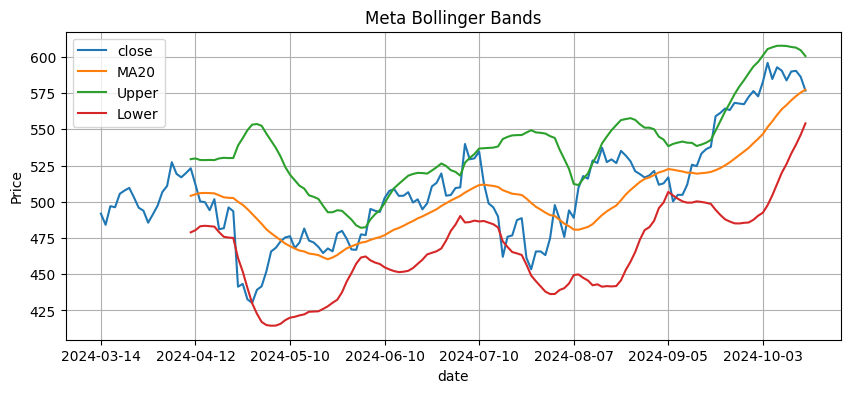

In [11]:
stockprices = get_ticker('META')
chart_bollinger_bands(stockprices)